<a href="https://colab.research.google.com/github/GiulianaMarcato/PerfildoProfissional/blob/main/Perfil_do_Profissional_de_Dados_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Perfil do Profissional de Dados no Brasil**

Para traçar um perfil do profissional de dados no Brasil, vamos buscar um conjunto de dados no Kaggle (https://www.kaggle.com/datasets/datahackers/pesquisa-data-hackers-2019), que traz uma pesquisa bem completa com 1765 profissionais da área.

Vamos responder algumas questões:
1. Qual o salário médio de um profissional de dados?
    2. Em relação à profissão?
    3. Em relação à idade?
    4. Em relação à experiência?
    5. Em relação a experiência de Cientista de Dados?
6. Qual a relação entre grau de formação e salário?
5. Qual a região brasileira que tem mais profissionais de dados?


## **ETL dos Dados**

### **Importação da Biblioteca Pandas**

In [3]:
import pandas as pd

### **Leitura do Arquivo .CSV**

In [4]:
caminho = '/content/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(caminho)

#### **Entendendo os Dados Disponíveis**

In [5]:
# O arquivo tem 170 colunas, e quero visualizar todas
pd.set_option("display.max_columns",200)

Porque o arquivo tem 170 colunas, se foram feitas somente 36 perguntas aos 1765 entrevistados?
Porque algumas perguntas tem várias opções a serem marcadas, como por exemplo, a questão 20 (P20) = Quais dos métodos listados abaixo você costuma utilizar no trabalho?

In [6]:
# Somente o cabeçalho do arquivo
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')","('P22', 'most_used_proggraming_languages')","('P23', 'sql')","('P23', 'nosql')","('P23', 'images')","('P23', 'nlp')","('P23', 'videos')","('P23', 'sheets')","('P23', 'other')","('P24', 'sql')","('P24', 'nosql')","('P24', 'imagens')","('P24', 'nlp')","('P24', 'vídeos')","('P24', 'planilhas')","('P24', 'other')","('P25', 'aws')","('P25', 'gcp')","('P25', 'azure')","('P25', 'ibm')","('P25', 'on_premise_servers')","('P25', 'cloud_própria')","('P25', 'other')","('P26', 'mysql')","('P26', 'oracle')","('P26', 'sql_server')","('P26', 'aurora')","('P26', 'dynamodb')","('P26', 'coachdb')","('P26', 'cassandra')","('P26', 'mongodb')","('P26', 'mariadb')","('P26', 'datomic')","('P26', 's3')","('P26', 'postgresql')","('P26', 'elaticsearch')","('P26', 'db2')","('P26', 'ms_access')","('P26', 'sqlite')","('P26', 'sybase')","('P26', 'firebase')","('P26', 'vertica')","('P26', 'redis')","('P26', 'neo4j')","('P26', 'google_bigtable')","('P26', 'hbase')","('P26', 'other')","('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')","('P28', 'sql_&_stored_procedures')","('P28', 'apache_airflow')","('P28', 'luigi')","('P28', 'aws_glue')","('P28', 'talend')","('P28', 'pentaho')","('P28', 'alteryx')","('P28', 'oracle_data_integrator')","('P28', 'ibm_data_stage')","('P28', 'sap_bw_etl')","('P28', 'siss_sql_server_integration_services')","('P28', 'other')","('P29', 'have_data_warehouse')","('P30', 'google_bigquery')","('P30', 'aws_redshift')","('P30', 'snowflake')","('P30', 'oracle')","('P30', 'postgres_mysql')","('P30', 'ibm')","('P30', 'teradata')","('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'd

Aqui temos mais detalhes sobre o arquivo, em dtypes podemos ver que há 5 variáveis do tipo número real, 146 do tipo número inteiro e 19 do tipo objeto/string.

In [7]:
# Algumas informações gerais do arquivo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


### **Verificando Dados Nulos**

Para todo e qualquer conjunto de dados a ser analisado, é importante identificar se há dados nulos. Pois, dependendo da quantidade de nulos, e da variável que for, a análise torna-se inválida.

O motivo para ter dados nulos pode ser porque ao disponibilizar os dados tiveram que retirar alguns deles, ou pode ser porque não conseguiram obter tais dados, ou ainda tiveram algum problema de armazenamento.

No conjunto de dados em questão, temos que:
- As variáveis Gender, Draw Participation, Age, Born ou Graduated e Anonymized Degree Area tem entre 0% e 1% de dados faltantes, o que é muito bom.
- As variáveis Data Science Plataforms Preference, Workers Number, Manager, Salary Range e Anonymized Market Sector estão entre 7% e 13% dos dados faltantes, o que ainda é aceitável.
- As variáveis Living State, Living Macroregion e a Anonymized Role  então entre 19% e 29% dos dados faltantes, o que é preocupante mas ainda assim não impede a análise.
- As variáveis Most Used Proggraming Languages, Have Data Warehouse, Origin Macroregion, Anonymized Manager Level e outros estão com porcentagens bem altas entre 48% e 82% o que inviabiliza a análise.

Lembrando que a porcentagem de viabilidade não é regra, o que torna a variável viável ou não é a proporção em relação ao total de dados. Nesse caso, 20% de 1765 é considerável, mas ainda viável, já 80% de 1765 fica impossível a análise, a amostra não seria representativa.


In [8]:
# Verificando a integridade dos dados
# Isolando os dados nulos para quantificá-los. Ordenando pela média, asssim podemos ver a porcentagem de cada variável
dados.isnull().mean()[dados.isnull().mean() != 0].sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

### **Tratamento Variável Profissões**

Iniciando o tratamento dos dados pela variável que nos diz quais profissões os entrevistados responderam ter (Questão D6 - Anonymized Role).

Temos uma lista com profissões variadas da área de dados. Mas sabemos que algumas, mesmo que tenham o nome diferente, no dia-a-dia praticam tarefas similares. Então, em seguida foi feito o agrupamento das que são similares, e das que não vamos analisar agora. Sendo que as variáveis continuam sendo categóricas, mas agora menores.

In [9]:
dados["('D6', 'anonymized_role')"].value_counts().sort_values()

Economista                                  10
Estatístico                                 11
DBA/Administrador de Banco de Dados         14
Engenheiro de Machine Learning              15
Analista de Marketing                       19
Engenheiro                                  26
Analista de Inteligência de Mercado         29
Business Analyst/Analista de Negócios       72
Data Engineer/Engenheiro de Dados          130
Business Intelligence/Analista de BI       150
Data Analyst/Analista de Dados             163
Data Scientist/Cientista de Dados          167
Outras                                     220
Desenvolvedor ou Engenheiro de Software    225
Name: ('D6', 'anonymized_role'), dtype: int64

In [10]:
profmap = {'Desenvolvedor ou Engenheiro de Software' : 'Desenvolvedor ou Engenheiro de Software',
                                            'Outras' : 'Outras',
                 'Data Scientist/Cientista de Dados' : 'Cientista de Dados',
                    'Data Analyst/Analista de Dados' : 'Analista de Dados',
              'Business Intelligence/Analista de BI' : 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados' : 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios' : 'Analista de BI',
               'Analista de Inteligência de Mercado' : 'Analista de BI',
                                        'Engenheiro' : 'Outras',
                             'Analista de Marketing' : 'Outras',
                    'Engenheiro de Machine Learning' : 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados' : 'Engenheiro de Dados',
                                       'Estatístico' : 'Cientista de Dados',
                                        'Economista' : 'Outras'}

dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)

Verificamos no gráfico que a análise ficará mais fácil, já que temos menos categorias, e essas estão com números mais significativos.

<Axes: >

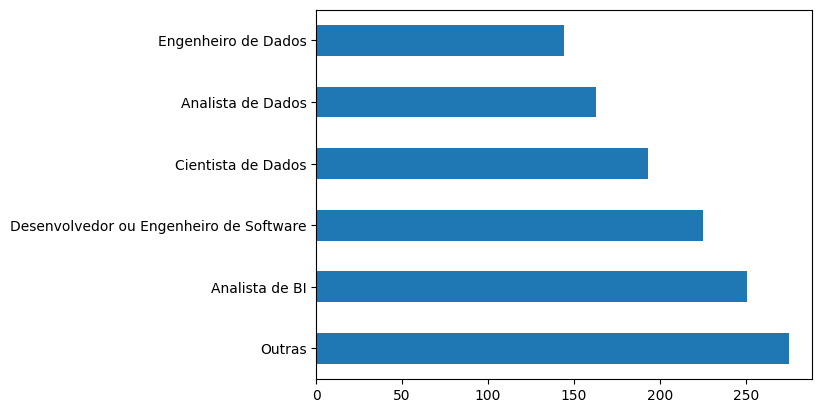

In [11]:
dados['profissao'].value_counts().plot(kind = 'barh')

### **Tratamento Variável Salário**

Nesta variável temos o mesmo desafio da variável profissões, muitas categorias, e ainda em formato categórico, ou seja, não conseguiríamos fazer uma média salarial. (P16 - Qual sua faixa salarial atual? [Mascarada])

Portanto vamos fazer o tratamento utilizando uma técnica de estatística, onde será aplicado um número médio para cada categoria, por exemplo, de RS1.001 a RS2.000, será o valor de R$1.500. E assim transformamos uma variável categórica em numérica.

In [12]:
dados["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

In [13]:
salamap = {       'Menos de R$ 1.000/mês' : 1000,
         'de R$ 1.001/mês a R$ 2.000/mês' : 1500,
          'de R$ 2.001/mês a R$ 3000/mês' : 2500,
         'de R$ 3.001/mês a R$ 4.000/mês' : 3500,
         'de R$ 4.001/mês a R$ 6.000/mês' : 5000,
         'de R$ 6.001/mês a R$ 8.000/mês' : 7000,
        'de R$ 8.001/mês a R$ 12.000/mês' : 10000,
       'de R$ 12.001/mês a R$ 16.000/mês' : 14000,
       'de R$ 16.001/mês a R$ 20.000/mês' : 18000,
       'de R$ 20.001/mês a R$ 25.000/mês' : 22500,
                 'Acima de R$ 25.001/mês' : 25000}

### **Tratamento Variável Tamanho de Empresa**

Vamos diminuir as categorias desta variável, assim como fizemos com as Profissões. Colocando como empresas pequenas, as que têm até 100 funcionários, as médias de 101 à 1.000 funcionários e as grandes com mais de 1.000 funcionários. (P12 - A empresa em que você trabalha possui quantos funcionários atualmente?)

In [14]:
tammap = {'de 1 a 5' : 'Pequena',
          'de 6 a 10' : 'Pequena',
          'de 11 a 50' : 'Pequena',
          'de 51 a 100' : 'Pequena',
          'de 101 a 500' : 'Média',
          'de 501 a 1000' : 'Média',
          'de 1001 a 3000' : 'Grande',
          'Acima de 3000' : 'Grande'}

### **Tratamento Variável Idade**

Agora temos uma variável numérica, mas muito ampla, então vamos aplicar a estratégia de cortes.
Assim diminuímos as categorias, e ainda continua numérica.

In [15]:
cortes = [0, 24, 30, 40, 100]
nomes = [ '[18, 24]', '[25,30]', '[31,40]', '[41,50]']

In [16]:
dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

### **Tratamento dos Dados Gerais**

Somente para melhor compreensão dos dados, vamos passar os nomes das variáveis do inglês para o português.

In [17]:

dados['salario'] = dados["('P16', 'salary_range')"].map(salamap)
dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap)

dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})

dados['sexo'] = dados["('P2', 'gender')"]
dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"]

dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]
dados['escolaridade'] = dados["('P8', 'degreee_level')"]

dados['area_formacao'] = dados["('D3', 'anonymized_degree_area')"]
dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]

dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"]


E agora conseguimos "chamar" as variáveis com o nome em português.

E é possível também fazer a média dos salários, por exemplo. Vamos iniciar a responder as perguntas feitas no início do arquivo.


## **Análise dos Dados**

### **1. Qual o salário médio de um profissional de dados?**

#### **Em relação à profissão?**

Aqui vamos fazer uma média do salário para cada profissão citada na pesquisa.

E podemos ver que os salários de Analista de BI e de Analista de Dados são bem parecidos, ou seja, são profissiões parecidas no seu dia-a-dia.

Vemos também que a média do salário mais alto é para Engenheiro de Dados, área que alimenta a área de Cientista de Dados, que é a segunda maior média de salários, segundo a pesquisa.

In [18]:
dados.groupby(['profissao']).mean()['salario'].round(2).sort_values()

<ipython-input-18-367446e6f095>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados.groupby(['profissao']).mean()['salario'].round(2).sort_values()


profissao
Outras                                     4854.55
Analista de BI                             4978.09
Analista de Dados                          5036.81
Desenvolvedor ou Engenheiro de Software    5133.33
Cientista de Dados                         6831.61
Engenheiro de Dados                        7802.08
Name: salario, dtype: float64

#### **Em relação à idade?**

Nota-se que a média salarial aumenta conforme a faixa de idade.

In [19]:
dados['salario'].groupby(dados['idade']).mean()

idade
[18, 24]    3083.333333
[25,30]     5466.371681
[31,40]     8417.159763
[41,50]     9590.909091
Name: salario, dtype: float64

#### **Em relação à experiência?**

Com isso percebemos que a idade, não é decisiva no salário, mas sim a experiência. Vemos que conforme a experiência aumenta, a média salarial também aumenta. Por exemplo, uma pessoa com 40 anos que ingressa agora no mercado de trabalho não entra recebendo RS8.000,00, mas sim algo entre R$3.000,00 e RS4.000,00.

In [20]:
dados['salario'].groupby(dados['experiencia_ds']).mean().round(2).sort_values()

experiencia_ds
Menos de 1 ano                             3961.64
Não tenho experiência na área de dados     4648.15
de 1 a 2 anos                              5125.41
de 2 a 3 anos                              6290.75
de 4 a 5 anos                              8374.25
de 6 a 10 anos                             9384.39
Mais de 10 anos                           10711.54
Name: salario, dtype: float64

### **Analisando somente o conjunto de Cientista de Dados**

Para isso, foi criado um novo conjunto de dados (cds). Assim conseguimos analisar cada variável somente dentro de Cientista de Dados.

E vemos que o salário em relação à experiência na área também aumenta conforme o tempo de experiência, assim como a área em geral.

In [21]:
cds = dados[dados['profissao'] == 'Cientista de Dados']

cds['salario'].groupby(cds['experiencia_ds']).mean().round(2).sort_values()

experiencia_ds
Não tenho experiência na área de dados     2500.00
Menos de 1 ano                             3675.00
de 1 a 2 anos                              5333.33
de 2 a 3 anos                              6704.55
Mais de 10 anos                           10409.09
de 4 a 5 anos                             10648.15
de 6 a 10 anos                            12923.08
Name: salario, dtype: float64

#### Em relação ao gênero?


E infelizmente, temos o resultado como na maioria das profissões do país, onde a diferença entre salários de mulher e homem é discrepante. A média salarial feminina é de RS5.774,19 e a masculina é de RS7.071,43.

<Axes: xlabel='sexo'>

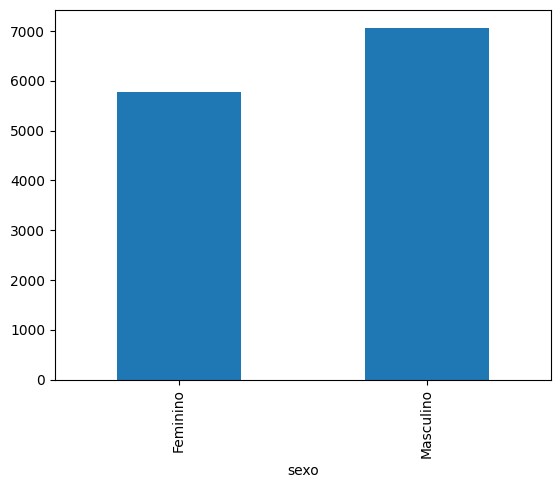

In [22]:
cds['salario'].groupby(cds['sexo']).mean().round(2).sort_values().plot(kind = 'bar')

E com isso cabe aqui, uma contagem de quantos entrevistados são homens e quantos são mulheres. E vemos que é uma área predominantemente masculina, com 161 homens e apenas 31 mulheres.

<Axes: ylabel="('P2', 'gender')">

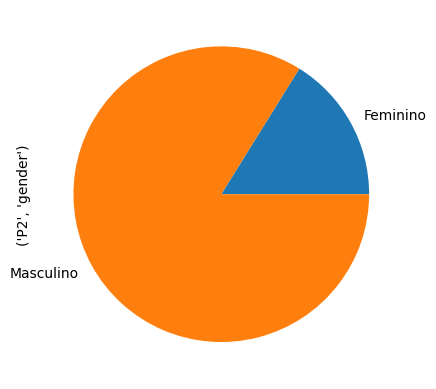

In [23]:
cds["('P2', 'gender')"].value_counts().sort_values().plot(kind = 'pie')



#### **Em relação ao tamanho das empresas, qual tem a maior remuneração?**

E como o esperado, nas maiores empresas temos os maiores salários, nas médias, salários médios, e nas pequenas, salários menores. E podemos dizer que as empresas grandes têm mais poder para remunerar melhor seus funcionários, e ainda têm mais necessidade de bons profissionais, afinal, quanto maior a empresa, maiores os problemas.

<Axes: xlabel='tamanho_da_empresa'>

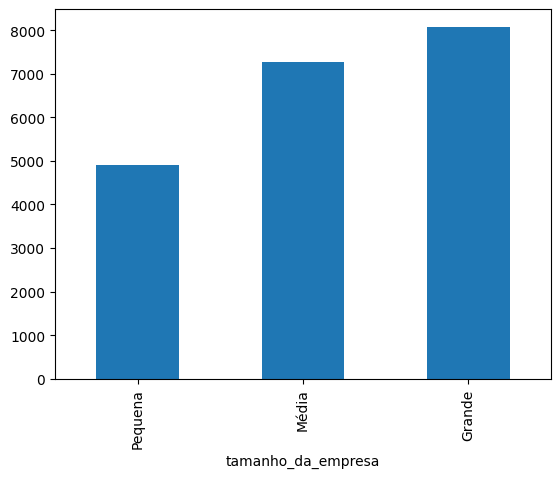

In [24]:
cds['salario'].groupby(cds['tamanho_da_empresa']).mean().round(2).sort_values().plot(kind = 'bar')

#### **Em relação ao gênero e tamanho da empresa?**


Nessa análise também temos o resultado esperado nas empresas médias e pequenas. Nas empresas grandes os números mostram algo inesperado, que o gênero feminino recebe maiores salários que o masculino. Portanto é indicado verficar a quantidade da amostra.

<ipython-input-25-744ce5b5bbca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cds.groupby(['tamanho_da_empresa','sexo']).mean()['salario'].round(2).unstack().plot(kind= 'bar')


<Axes: xlabel='tamanho_da_empresa'>

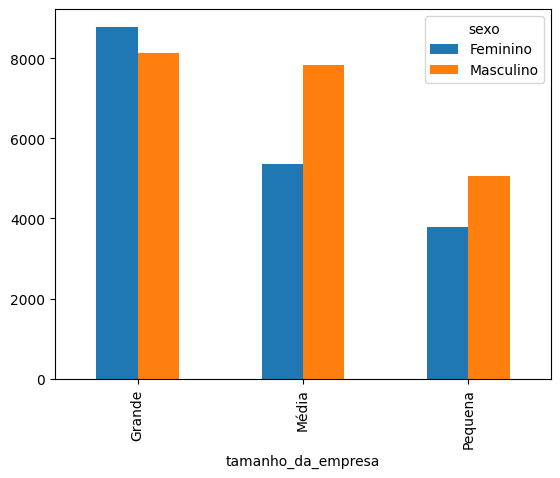

In [25]:
cds.groupby(['tamanho_da_empresa','sexo']).mean()['salario'].round(2).unstack().plot(kind= 'bar')

E temos somente 7 pessoas do sexo feminino, tanto na empresa grande, quanto na pequena, o que nos sugere que os dados acima não são significativos, porque temos uma amostra muito pequena em relação ao todo.


In [26]:
cds.groupby(['tamanho_da_empresa','sexo']).count()['salario']

tamanho_da_empresa  sexo     
Grande              Feminino      7
                    Masculino    55
Média               Feminino     17
                    Masculino    56
Pequena             Feminino      7
                    Masculino    50
Name: salario, dtype: int64

#### **Em relação à escolaridade?**

Fica claro, que conforme o grau de escolaridade aumenta, a remuneração acompanha o progresso.

In [27]:
cds.groupby(['escolaridade']).mean()['salario'].round(2).sort_values()

<ipython-input-27-095e64fe73c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cds.groupby(['escolaridade']).mean()['salario'].round(2).sort_values()


escolaridade
Estudante de Graduação         3363.64
Graduação/Bacharelado          5459.68
Não tenho graduação formal     6416.67
Mestrado                       7918.60
Pós-graduação                  8986.84
Doutorado ou Phd              13500.00
Name: salario, dtype: float64

Para concluir, podemos dizer que a remuneração alta da área de Ciência de Dados, está relacionada à 2 fatores: experiência e escolaridade.

E ainda podemos aprofundar a análise, detalhando os dados. Vemos que somente 6 pessoas informaram que não têm graduação formal. E ainda com um devio padrão de 6053,24, o que é considerado alto nesse caso.

In [28]:
cds.groupby(['escolaridade']).describe()['salario'].round(2)

,count,mean,std,min,25%,50%,75%,max
escolaridade,,,,,,,,
Doutorado ou Phd,11.0,13500.00,7221.50,5000.0,10000.0,10000.0,18250.0,25000.0
Estudante de Graduação,33.0,3363.64,3939.53,1000.0,1500.0,2500.0,3500.0,22500.0
Graduação/Bacharelado,62.0,5459.68,3075.95,1000.0,3500.0,5000.0,7000.0,18000.0
Mestrado,43.0,7918.60,3387.53,1500.0,5000.0,7000.0,10000.0,18000.0
Não tenho graduação formal,6.0,6416.67,6053.24,1000.0,3125.0,5000.0,6500.0,18000.0
Pós-graduação,38.0,8986.84,4638.98,2500.0,5000.0,7000.0,10000.0,22500.0


O que torna a análise curiosa, então vamos isolar essas pessoas para tentar entender a relação entre Não ter Graduação Formal e Salário.

In [29]:
cds[cds['escolaridade'] == 'Não tenho graduação formal']['salario']

165      2500.0
536      7000.0
626      5000.0
1142     5000.0
1290    18000.0
1764     1000.0
Name: salario, dtype: float64

E podemos notar que, uma pessoa informou o salário de 18.000,00 reais, o que faz aumentar a média, é um outliner, já que as outras pessoas têm salários entre 1.000,00 e 7.000,00 reais.

Então podemos levar em consideração a mediana (50%), para saber o salário da categoria Não tenho graduação formal, que informa o salário de 5.000,00 reais, e não 6.416,67, como a média.

#### **Qual a linguagem mais utilizada?**

E analisando essa questão temos que 89,63% das pessoas utilizam Python no dia a dia de trabalho.

In [30]:
cds.filter(regex = 'P21').mean().sort_values(ascending = False)

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'dotnet')                 0.010363
('P21', 'julia')                  0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

E mesmo analisando o conjunto total de dados, temos que 44,41% das pessoas utilizam PYthon, o que é um número bem elevado.

In [31]:
dados["('P21', 'python')"].mean()

0.4441926345609065

Python é a linguagem mais usada pelos cientistas de dados, com 89,63%. A segunda mais usada é SQL com 73,05% e a terceira é R com 38,34%. O que nos diz que essas 3 linguagens são muito importantes de serem aprendidas, já as demais seriam diferenciais, mas ao mesmo tempo, podem dificultar o trabalho na empresa por falta de suporte.

#### **Qual o método mais utilizado?**

In [32]:
cds.filter(regex = 'P20').mean().sort_values(ascending = False)

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


A Regressão Linear é a mais usada com 74,09%, seguida por Regressão Logística com 67,35% e em terceiro lugar a Árvore de Decisão com 65,28%.

#### **Qual a ferramenta de Bussiness Intelligence mais utilizada?**

In [33]:
cds.filter(regex = 'P27').mean().sort_values(ascending = False)

('P27', 'microsoft_powerbi')               0.336788
('P27', 'no_bi_tool_at_work')              0.217617
('P27', 'metabase')                        0.186528
('P27', 'tableau')                         0.176166
('P27', 'google_data_studio')              0.134715
('P27', 'qlik_view_qlik_sense')            0.088083
('P27', 'only_excel_gsheets')              0.077720
('P27', 'other')                           0.077720
('P27', 'redash')                          0.041451
('P27', 'ibm_analytics_cognos')            0.025907
('P27', 'superset')                        0.020725
('P27', 'microstrategy')                   0.020725
('P27', 'looker')                          0.015544
('P27', 'sap_business_objects')            0.005181
('P27', 'oracle_business_intelligence')    0.005181
('P27', 'birst')                           0.000000
dtype: float64

E conforme esperado, Power BI é a mais utilizada, com 33,67%, seguida de Metabase com 18,65% e em terceiro lugar o Tableau com 17,16%.

Mas podemos analisar também somente os Analistas de BI, que utilizariam mais essas ferramentas.

In [34]:
abi = dados[dados['profissao'] == 'Analista de BI']

In [35]:
abi.filter(regex = 'P27').mean().sort_values(ascending = False)

('P27', 'microsoft_powerbi')               0.274900
('P27', 'tableau')                         0.095618
('P27', 'qlik_view_qlik_sense')            0.083665
('P27', 'only_excel_gsheets')              0.079681
('P27', 'other')                           0.063745
('P27', 'metabase')                        0.051793
('P27', 'google_data_studio')              0.043825
('P27', 'microstrategy')                   0.027888
('P27', 'no_bi_tool_at_work')              0.027888
('P27', 'sap_business_objects')            0.023904
('P27', 'ibm_analytics_cognos')            0.019920
('P27', 'superset')                        0.011952
('P27', 'oracle_business_intelligence')    0.007968
('P27', 'looker')                          0.003984
('P27', 'redash')                          0.000000
('P27', 'birst')                           0.000000
dtype: float64

E o interessante que percebemos aqui é que o grupo de Cientistas de Dados utilizam mais as ferramentas de BI do que os profissionais da Analista de BI.